In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('./data.csv',header=None)
data = np.array(data,dtype='float64').transpose()
X = data[0].reshape(-1,1)
Y = data[1].reshape(-1,1)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

In [55]:
reg.score(X, Y)

0.598655791538662

In [134]:
reg.coef_

array([[1.32243102]])

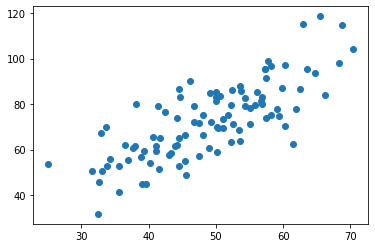

In [133]:
plt.scatter(X,Y)

In [87]:
def training_error(coeffs,arrx,arry):
    thetadotx = (coeffs[1] * np.array(arrx,dtype= 'float64')) + coeffs[0]
    n = len(arrx)
    y_min_thetadotx = arry - thetadotx
    y_min_thetadotx_squared = np.square(arry - thetadotx)
    error = np.sum(y_min_thetadotx_squared)/(n)
    return error

In [137]:
def gd(arrx, arry,learning_rate=0.01, epochs=100):
    theta = np.zeros(2)
    ones = np.ones(shape=arrx.shape)
    arrx_array = np.concatenate((ones, arrx),1)
    arry_array = np.array(arry, dtype='float64')
    n = len(arrx)
    minloss = 10**10
    bestTheta = 0
    
    for j in range(epochs):
        for i in range(n):
            predVal = np.dot(theta, arrx_array[i]) 
            y_min = arry_array[i] - predVal
            x_mul = (-2/ n )*arrx_array[i] * y_min
            learning = learning_rate * x_mul
            theta -= learning
            loss = training_error(theta, arrx,arry)
            if loss < minloss:
                minloss = loss
                bestTheta = np.copy(theta)
    return bestTheta , minloss

In [138]:
gd(X,Y)

(array([0.66943026, 1.46621034]), 112.28121203753692)

PART 2

In [278]:
from sklearn.pipeline import Pipeline

In [279]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

In [280]:
pipeline = Pipeline(steps) # define the pipeline object.

In [281]:
data_new = pd.read_csv('./chicago_hotel_reviews.csv')
data_new

,Unnamed: 0,docid,review,rating
0,0,usa_illinois_chicago_the_talbott_hotel,\tWonderful\tI had a sore throat and the hotel...,4.672131
1,1,usa_illinois_chicago_sofitel_chicago_water_tower,Nov 20 2009 \tDidn't want to check out...\tPer...,4.601329
2,2,usa_illinois_chicago_trump_international_hotel...,\tWOW!!\tGreat hotel! Stayed there with my wif...,4.696296
3,3,usa_illinois_chicago_hampton_inn_majestic_chicago,\tStaff Went Above \tWhile waiting for our gue...,4.595455
4,4,usa_illinois_chicago_residence_inn_chicago_dow...,\tWonderful Hotel Will Definately Stay Here Ag...,4.645000
5,5,usa_illinois_chicago_hotel_monaco_chicago_a_ki...,\tPerfection\tOur family of 3 stayed for 4 nig...,4.517476
6,6,usa_illinois_chicago_park_hyatt_chicago,Nov 19 2009 \tGREAT FIVE STAR\tI have become a...,4.643373
7,7,usa_illinois_chicago_springhill_suites_chicago...,\tDefinite Return Trip to this One!\tThis was ...,4.559459
8,8,usa_illinois_chicago_homewood_suites_by_hilton...,\tGreat hotel!\tThe staff was amazing.The brea...,4.560185
9,9,usa_illinois_chicago_affinia_chicago,\tPerfection in service.\tWe recently travelle...,4.624335


In [282]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [283]:
data_new['review'] = data_new['review'].apply(lambda x:pre_process(x))

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new['review'],data_new['rating'],test_size=0.2)

In [287]:
from sklearn.metrics import mean_squared_error 
vectoriser = TfidfVectorizer()
lin_reg  =LinearRegression()

steps = [('TF-IDF', vectoriser), ('linear Regression', lin_reg)]
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

print(mean_squared_error(y_test,predicted))

1.0847707862256168
